# Import necessary libraries

In [46]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

# Get a link to scrape

In [47]:
# Scrape a single match shots
base_url = 'https://understat.com/match/'

# Type the match id
match = '22336' 
url = base_url+match

# Get data

In [48]:
# Use requests to get the webpage and BeautifulSoup to parse the page

res = requests.get(url)
soup = BeautifulSoup(res.content)
scripts = soup.find_all('script')

In [49]:
# Get only the shotsData

strings = scripts[1].string

In [50]:
strings[0:1000]

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22537768\\x22,\\x22minute\\x22\\x3A\\x224\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.9290000152587891\\x22,\\x22Y\\x22\\x3A\\x220.47\\x22,\\x22xG\\x22\\x3A\\x220.5627743005752563\\x22,\\x22player\\x22\\x3A\\x22Henrikh\\x20Mkhitaryan\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22317\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222023\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x2222336\\x22,\\x22h_team\\x22\\x3A\\x22Inter\\x22,\\x22a_team\\x22\\x3A\\x22AC\\x20Milan\\x22,\\x22h_goals\\x22\\x3A\\x225\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222023\\x2D09\\x2D16\\x2016\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Federico\\x20Dimarco\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22537769\\x22,\\x22minute\\x22\\x3A\\x229\\x22,\\x22result\\x22\\x3A\\x22Block

# Decoding data

In [51]:
# Strip unnecessary symbols and get only JSON data 

str_start = strings.index("('")+2 
str_end = strings.index("')") 
json_data = strings[str_start:str_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convert string to JSON

data = json.loads(json_data)

In [52]:
data

{'h': [{'id': '537768',
   'minute': '4',
   'result': 'Goal',
   'X': '0.9290000152587891',
   'Y': '0.47',
   'xG': '0.5627743005752563',
   'player': 'Henrikh Mkhitaryan',
   'h_a': 'h',
   'player_id': '317',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'LeftFoot',
   'match_id': '22336',
   'h_team': 'Inter',
   'a_team': 'AC Milan',
   'h_goals': '5',
   'a_goals': '1',
   'date': '2023-09-16 16:00:00',
   'player_assisted': 'Federico Dimarco',
   'lastAction': 'Pass'},
  {'id': '537769',
   'minute': '9',
   'result': 'BlockedShot',
   'X': '0.9440000152587891',
   'Y': '0.624000015258789',
   'xG': '0.05038038268685341',
   'player': 'Alessandro Bastoni',
   'h_a': 'h',
   'player_id': '4939',
   'situation': 'FromCorner',
   'season': '2023',
   'shotType': 'LeftFoot',
   'match_id': '22336',
   'h_team': 'Inter',
   'a_team': 'AC Milan',
   'h_goals': '5',
   'a_goals': '1',
   'date': '2023-09-16 16:00:00',
   'player_assisted': 'Federico Dimarco',
   'las

In [53]:
# Our JSON consists of home (h) and away (a) objects
# Home

data['h'][0]

{'id': '537768',
 'minute': '4',
 'result': 'Goal',
 'X': '0.9290000152587891',
 'Y': '0.47',
 'xG': '0.5627743005752563',
 'player': 'Henrikh Mkhitaryan',
 'h_a': 'h',
 'player_id': '317',
 'situation': 'OpenPlay',
 'season': '2023',
 'shotType': 'LeftFoot',
 'match_id': '22336',
 'h_team': 'Inter',
 'a_team': 'AC Milan',
 'h_goals': '5',
 'a_goals': '1',
 'date': '2023-09-16 16:00:00',
 'player_assisted': 'Federico Dimarco',
 'lastAction': 'Pass'}

In [54]:
# Away

data['a'][0]

{'id': '537771',
 'minute': '12',
 'result': 'SavedShot',
 'X': '0.8830000305175781',
 'Y': '0.415',
 'xG': '0.023908257484436035',
 'player': 'Davide Calabria',
 'h_a': 'a',
 'player_id': '1574',
 'situation': 'OpenPlay',
 'season': '2023',
 'shotType': 'Head',
 'match_id': '22336',
 'h_team': 'Inter',
 'a_team': 'AC Milan',
 'h_goals': '5',
 'a_goals': '1',
 'date': '2023-09-16 16:00:00',
 'player_assisted': 'Tijjani Reijnders',
 'lastAction': 'Pass'}

# Converting JSON to DataFrame

In [55]:
# Separate home and away teams into different DataFrames

from pandas import json_normalize

#data_all = json_normalize(data, sep = "_")
data_home = json_normalize(data['h'])
data_away = json_normalize(data['a'])

In [56]:
data_home.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,537768,4,Goal,0.9290000152587891,0.47,0.5627743005752563,Henrikh Mkhitaryan,h,317,OpenPlay,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Pass
1,537769,9,BlockedShot,0.9440000152587891,0.624000015258789,0.05038038268685341,Alessandro Bastoni,h,4939,FromCorner,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross
2,537770,10,MissedShots,0.9180000305175782,0.5629999923706055,0.3145897686481476,Henrikh Mkhitaryan,h,317,OpenPlay,2023,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross
3,537772,16,BlockedShot,0.8809999847412109,0.3579999923706055,0.07746720314025879,Marcus Thuram,h,5992,OpenPlay,2023,RightFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,None,None
4,537773,17,BlockedShot,0.9530000305175781,0.5029999923706054,0.05950922891497612,Francesco Acerbi,h,1463,FromCorner,2023,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Hakan Calhanoglu,CornerAwarded


# DataFrames for home and away teams

In [57]:
df_home = pd.DataFrame(data_home)
df_home.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,537768,4,Goal,0.9290000152587891,0.47,0.5627743005752563,Henrikh Mkhitaryan,h,317,OpenPlay,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Pass
1,537769,9,BlockedShot,0.9440000152587891,0.624000015258789,0.05038038268685341,Alessandro Bastoni,h,4939,FromCorner,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross
2,537770,10,MissedShots,0.9180000305175782,0.5629999923706055,0.3145897686481476,Henrikh Mkhitaryan,h,317,OpenPlay,2023,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross
3,537772,16,BlockedShot,0.8809999847412109,0.3579999923706055,0.07746720314025879,Marcus Thuram,h,5992,OpenPlay,2023,RightFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,None,None
4,537773,17,BlockedShot,0.9530000305175781,0.5029999923706054,0.05950922891497612,Francesco Acerbi,h,1463,FromCorner,2023,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Hakan Calhanoglu,CornerAwarded


In [58]:
df_away = pd.DataFrame(data_away)
df_away.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,537771,12,SavedShot,0.8830000305175781,0.415,0.023908257484436035,Davide Calabria,a,1574,OpenPlay,2023,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Tijjani Reijnders,Pass
1,537775,30,MissedShots,0.9640000152587891,0.6120000076293945,0.3412771224975586,Theo Hernández,a,2547,OpenPlay,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Olivier Giroud,TakeOn
2,537776,35,MissedShots,0.7430000305175781,0.51,0.02113274112343788,Malick Thiaw,a,8378,OpenPlay,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Davide Calabria,Pass
3,537777,36,BlockedShot,0.7519999694824219,0.4179999923706055,0.02277962677180767,Davide Calabria,a,1574,OpenPlay,2023,RightFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Rade Krunic,Pass
4,537779,41,BlockedShot,0.860999984741211,0.3290000152587891,0.022600073367357254,Ruben Loftus-Cheek,a,688,OpenPlay,2023,RightFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Olivier Giroud,HeadPass


# Saving as a CSV file

In [59]:
df_all = pd.concat([df_home, df_away])
df_all.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,537768,4,Goal,0.9290000152587891,0.47,0.5627743005752563,Henrikh Mkhitaryan,h,317,OpenPlay,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Pass
1,537769,9,BlockedShot,0.9440000152587891,0.624000015258789,0.05038038268685341,Alessandro Bastoni,h,4939,FromCorner,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross
2,537770,10,MissedShots,0.9180000305175782,0.5629999923706055,0.3145897686481476,Henrikh Mkhitaryan,h,317,OpenPlay,2023,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross
3,537772,16,BlockedShot,0.8809999847412109,0.3579999923706055,0.07746720314025879,Marcus Thuram,h,5992,OpenPlay,2023,RightFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,None,None
4,537773,17,BlockedShot,0.9530000305175781,0.5029999923706054,0.05950922891497612,Francesco Acerbi,h,1463,FromCorner,2023,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Hakan Calhanoglu,CornerAwarded


In [60]:
# checking the sizes

df_home.shape, df_away.shape, df_all.shape

((14, 20), (9, 20), (23, 20))

In [61]:
df_home.to_csv('inter_milan.csv', index=False)

# Checking

In [62]:
x = pd.read_csv('inter_milan.csv')
x.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,537768,4,Goal,0.929,0.470,0.562774,Henrikh Mkhitaryan,h,317,OpenPlay,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Pass
1,537769,9,BlockedShot,0.944,0.624,0.050380,Alessandro Bastoni,h,4939,FromCorner,2023,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross
2,537770,10,MissedShots,0.918,0.563,0.314590,Henrikh Mkhitaryan,h,317,OpenPlay,2023,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross
3,537772,16,BlockedShot,0.881,0.358,0.077467,Marcus Thuram,h,5992,OpenPlay,2023,RightFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,NaN,None
4,537773,17,BlockedShot,0.953,0.503,0.059509,Francesco Acerbi,h,1463,FromCorner,2023,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Hakan Calhanoglu,CornerAwarded


In [63]:
x.shape

(14, 20)

In [18]:
data_home.dtypes

id                 object
minute             object
result             object
X                  object
Y                  object
xG                 object
player             object
h_a                object
player_id          object
situation          object
season             object
shotType           object
match_id           object
h_team             object
a_team             object
h_goals            object
a_goals            object
date               object
player_assisted    object
lastAction         object
dtype: object

In [19]:
#Converting from string to float
data_home['xG'] = pd.to_numeric(data_home['xG'], downcast="float")
data_away['xG'] = pd.to_numeric(data_away['xG'], downcast="float")

#Converting from string to int
data_home['minute'] = pd.to_numeric(data_home['minute'], downcast="integer")
data_away['minute'] = pd.to_numeric(data_away['minute'], downcast="integer")

#Getting a column with cumulative result
data_home['cumsum_xg'] = data_home['xG'].cumsum()
data_away['cumsum_xg'] = data_away['xG'].cumsum()

In [20]:
data_home.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,cumsum_xg
0,537768,4,Goal,0.9290000152587891,0.47,0.562774,Henrikh Mkhitaryan,h,317,OpenPlay,...,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Pass,0.562774
1,537769,9,BlockedShot,0.9440000152587891,0.624000015258789,0.050380,Alessandro Bastoni,h,4939,FromCorner,...,LeftFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross,0.613155
2,537770,10,MissedShots,0.9180000305175782,0.5629999923706055,0.314590,Henrikh Mkhitaryan,h,317,OpenPlay,...,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Federico Dimarco,Cross,0.927745
3,537772,16,BlockedShot,0.8809999847412109,0.3579999923706055,0.077467,Marcus Thuram,h,5992,OpenPlay,...,RightFoot,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,None,None,1.005212
4,537773,17,BlockedShot,0.9530000305175781,0.5029999923706054,0.059509,Francesco Acerbi,h,1463,FromCorner,...,Head,22336,Inter,AC Milan,5,1,2023-09-16 16:00:00,Hakan Calhanoglu,CornerAwarded,1.064721


In [21]:
# Creating a df with the data we need only
home_df = data_home[['minute', 'cumsum_xg']]
away_df = data_away[['minute', 'cumsum_xg']]

# Creating objects for home/away minutes and xG
# Setting the 1st elements to zero, so the step chart start from zero position in both teams
h_min = [0]
a_min = [0]
h_xg = [0.0]
a_xg = [0.0]

# Adding to the lists above all the minutes and xG for home team
for x in range(len(home_df['minute'])):
    h_xg.append(home_df['cumsum_xg'].iloc[x])
    h_min.append(home_df['minute'].iloc[x])

# Adding to the lists above all the minutes and xG for away team
for x in range(len(away_df['minute'])):
    a_xg.append(away_df['cumsum_xg'].iloc[x])
    a_min.append(away_df['minute'].iloc[x])

In [22]:
a_xg, a_min

([0.0,
  0.023908257,
  0.36518538,
  0.38631812,
  0.40909773,
  0.43169782,
  0.59148204,
  0.6084324,
  0.92200154,
  0.9896114],
 [0, 12, 30, 35, 36, 41, 46, 54, 56, 91])

Text(0.5, 1.0, 'Inter (blue) vs AC Milan (red) 5:1')

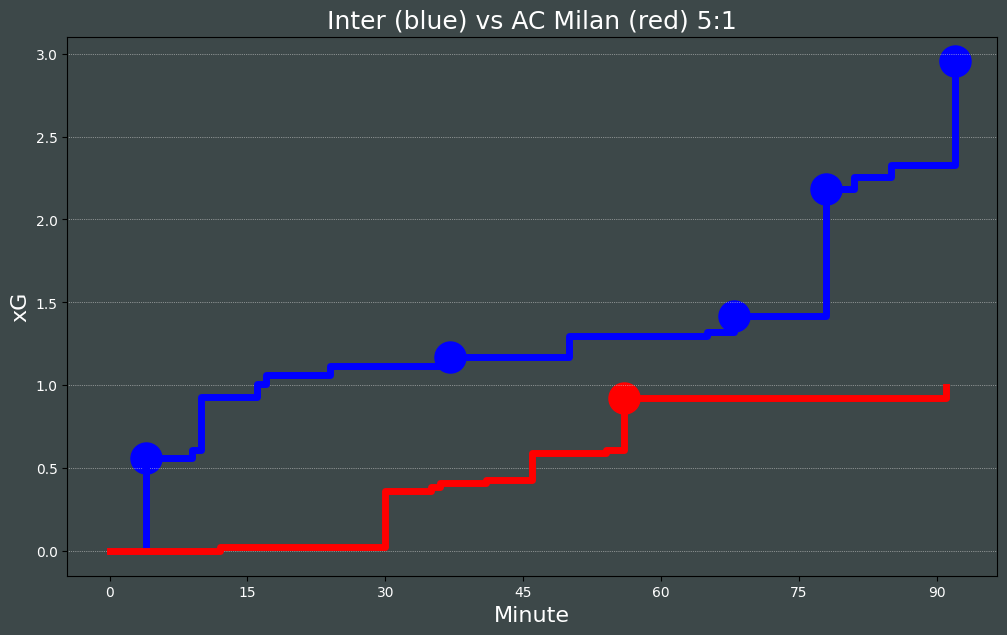

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

plt.xticks([0,15,30,45,60,75,90], color='white')
plt.yticks(color='white')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)

'''
#plot the step graphs
ax.step(x=data_home['minute'],y=data_home['cumsum_xg'],color='white',linewidth=5)
ax.step(x=data_away['minute'],y=data_away['cumsum_xg'],color='red',linewidth=5)
'''

# Passing our lists to step object to plot the chart
ax.step(x=h_min,y=h_xg,color='blue',linewidth=5, where='post')
ax.step(x=a_min,y=a_xg,color='red',linewidth=5, where='post') #check the where option

# Displaying scatter plots when goals were scored for home team
for i in range(len(data_home['id'])):
    if data_home.iloc[i]['result'] == 'Goal':
        ax.scatter(data_home.iloc[i]['minute'], data_home.iloc[i]['cumsum_xg'], color='blue', s=500, marker='o', alpha=1)
    if data_home.iloc[i]['result'] == 'OwnGoal':
        ax.scatter(data_home.iloc[i]['minute'], data_home.iloc[i]['cumsum_xg'], color='red', s=500, marker='o', alpha=1)

# Displaying scatter plots when goals were scored for away team
for i in range(len(data_away['id'])):
    if data_away.iloc[i]['result'] == 'Goal':
        ax.scatter(data_away.iloc[i]['minute'], data_away.iloc[i]['cumsum_xg'], color='red', s=500, marker='o', alpha=1)
    if data_away.iloc[i]['result'] == 'OwnGoal':
        ax.scatter(data_away.iloc[i]['minute'], data_away.iloc[i]['cumsum_xg'], color='blue', s=500, marker='o', alpha=1)

plt.title(data_home.iloc[0]['h_team'] + ' (blue) vs ' + data_home.iloc[0]['a_team'] + ' (red) ' +\
          str(data_home.iloc[0]['h_goals']) + ':' + str(data_away.iloc[0]['a_goals']), color='white', fontsize=18)

#plt.xlim([0,90])